# Домашнее задание 1 - предсказание задержки авиарейсов


### О задании

Практическое задание посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания получившийся файл \*.ipynb с решением необходимо выложить в свой репозиторий github.

### Pandas

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [466]:
import pandas as pd
import numpy as np
%matplotlib inline

**1.** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [469]:
import pandas as pd
file_path = "C:\\Users\\Admin-100n\\OneDrive\\Документы\\2008.csv"
data_frame = pd.read_csv(file_path)
cancellation_codes = data_frame["CancellationCode"]
most_common_code = cancellation_codes.mode()
print("Наиболее частая причина отмены рейса:", most_common_code)


Наиболее частая причина отмены рейса: 0    A
Name: CancellationCode, dtype: object


**2.** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [472]:
import pandas as pd
data = pd.read_csv("C:\\Users\\Admin-100n\\OneDrive\\Документы\\2008.csv")
distance = data['Distance']
average_distance = distance.mean()
min_distance = distance.min()
max_distance = distance.max()
print("Среднее расстояние:", average_distance)
print("Минимальное расстояние:", min_distance)
print("Максимальное расстояние:", max_distance)


Среднее расстояние: 724.5082571428571
Минимальное расстояние: 31
Максимальное расстояние: 4962


**3.** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [475]:
import pandas as pd
import numpy as np
min_data = data.loc[distance == 31][["FlightNum", "Distance", "DayofMonth", "Month"]]
min_data

,FlightNum,Distance,DayofMonth,Month
1116,65,31,30,12
6958,65,31,26,12
17349,64,31,18,8
27534,64,31,11,3
46082,65,31,9,8
48112,64,31,28,2


In [477]:
import pandas as pd
import numpy as np
list = [64,65]
other = data[data["FlightNum"].isin(list)][[ "Month", "DayofMonth", "DayOfWeek","FlightNum", "Distance"]]
pd.set_option("display.max_rows", None)
other

,Month,DayofMonth,DayOfWeek,FlightNum,Distance
501,3,20,4,64,533
1116,12,30,2,65,31
1389,3,13,4,64,680
1517,7,10,4,65,680
2619,5,23,5,64,2381
3869,7,1,2,64,82
4025,6,15,7,64,1005
4466,6,29,7,64,123
6326,10,18,6,65,82
6778,7,12,6,64,359


**4.** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [480]:
data = pd.read_csv("C:\\Users\\Admin-100n\\OneDrive\\Документы\\2008.csv")
airport_counts = data["Origin"].value_counts()
most_common_airport = airport_counts.idxmax()
most_common_count = airport_counts.max()

print( {most_common_airport}, "с количеством", {most_common_count}, "вылетов")

{'ATL'} с количеством {4134} вылетов


**5.** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [483]:
data[['Origin', 'AirTime']].groupby(by='Origin').mean()


,AirTime
Origin,
ABE,88.266667
ABI,36.400000
ABQ,93.454321
ABY,35.714286
ACK,50.800000
ACT,28.521739
ACV,55.606061
ACY,113.500000
ADK,142.000000


In [485]:
data.groupby("Origin")["AirTime"].mean().idxmax()

'SJU'

**6.** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [488]:
delayed_flights = data[data['DepDelay'] > 0]
filtered_delayed = delayed_flights.groupby('Origin').filter(lambda group: len(group) >= 1000).groupby('Origin').size()
filtered_flights = data.groupby('Origin').filter(lambda group: len(group) >= 1000).groupby('Origin').size()
delay_ratio = filtered_flights / filtered_delayed
airport_with_max_delay = delay_ratio.idxmax()
max_delay_ratio = delay_ratio.max()
print(f"Аэропорт с наибольшей долей задержанных рейсов: {airport_with_max_delay} с долей {max_delay_ratio:.2%}.")


Аэропорт с наибольшей долей задержанных рейсов: ATL с долей 237.72%.


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**7.** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [491]:
data = pd.read_csv("C:\\Users\\Admin-100n\\OneDrive\\Документы\\2008.csv")
missing_values = data.isnull().sum()
print("Количество пропущенных значений в каждом столбце:")
print(missing_values[missing_values > 0])


Количество пропущенных значений в каждом столбце:
DepTime               1399
ArrTime               1556
TailNum                820
ActualElapsedTime     1582
CRSElapsedTime           9
AirTime               1582
ArrDelay              1582
DepDelay              1399
TaxiIn                1556
TaxiOut               1406
CancellationCode     68589
CarrierDelay         54747
WeatherDelay         54747
NASDelay             54747
SecurityDelay        54747
LateAircraftDelay    54747
dtype: int64


In [493]:
Sum = data.isna().sum().sum()
print("Всего пропущенных элементов в таблице объект-признак:", Sum)
data = pd.read_csv("C:\\Users\\Admin-100n\\OneDrive\\Документы\\2008.csv")
rows_with_missing = data[data.isnull().any(axis=1)]
count_with_missing = len(rows_with_missing)
print(f"Количество объектов с хотя бы одним пропуском: {count_with_missing}")
data = pd.read_csv("C:\\Users\\Admin-100n\\OneDrive\\Документы\\2008.csv")
columns_with_missing = data.columns[data.isnull().any()]
count_with_missing_columns = len(columns_with_missing)
print(f"Количество признаков с хотя бы одним пропуском: {count_with_missing_columns}")

Всего пропущенных элементов в таблице объект-признак: 355215
Количество объектов с хотя бы одним пропуском: 70000
Количество признаков с хотя бы одним пропуском: 16


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [496]:
data = pd.read_csv("C:\\Users\\Admin-100n\\OneDrive\\Документы\\2008.csv")
has_missing_values = data["DepDelay"].isnull().any()
if has_missing_values:
    print("В целевой переменной 'DepDelay' имеются пропущенные значения.")
else:
    print("В целевой переменной 'DepDelay' нет пропущенных значений.")

В целевой переменной 'DepDelay' имеются пропущенные значения.


In [498]:
skip = data[data["DepDelay"].isna()]
pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", None)
skip

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
11,2008,3,6,4,NaN,1605,NaN,1940,AA,484,NaN,NaN,155.0,NaN,NaN,NaN,DFW,MIA,1121,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
78,2008,1,19,6,NaN,750,NaN,930,EV,4772,N683BR,NaN,100.0,NaN,NaN,NaN,ATL,CAK,528,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
103,2008,7,24,4,NaN,1230,NaN,1355,FL,816,N990AT,NaN,85.0,NaN,NaN,NaN,BOS,BWI,370,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
112,2008,2,4,1,NaN,620,NaN,758,NW,1281,N526US,NaN,98.0,NaN,NaN,NaN,MDW,MSP,349,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
128,2008,1,21,1,NaN,1838,NaN,2005,UA,1251,NaN,NaN,87.0,NaN,NaN,NaN,DSM,ORD,299,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69818,2008,6,9,1,NaN,1645,NaN,1800,MQ,3627,NaN,NaN,75.0,NaN,NaN,NaN,DFW,CRP,354,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
69836,2008,1,25,5,NaN,938,NaN,1030,MQ,3254,NaN,NaN,52.0,NaN,NaN,NaN,ACT,DFW,89,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
69884,2008,12,26,5,NaN,1935,NaN,2116,NW,1430,N330NW,NaN,101.0,NaN,NaN,NaN,MEM,MKE,556,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
69918,2008,3,1,6,NaN,600,NaN,742,EV,4715,N635AS,NaN,102.0,NaN,NaN,NaN,MYR,ATL,317,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


In [500]:
В таких случаях все рейсы были отменены, и в столбцах «Время прибытия», «Фактическое затраченное время», «Время в воздухе», «Задержка прибытия», 
«Задержка отправления», «Прибытие на такси» и других отсутствуют значения. Если в целевой переменной есть пропущенные значения, это означает, что 
рейсы не состоялись, поэтому столбцы «Отменен» и «Код отмены» можно исключить из анализа.

SyntaxError: invalid character '«' (U+00AB) (1840589985.py, line 1)

In [502]:
new = data[(data["DepDelay"].isna() == False) & (data["DepDelay"] != 0)]
DepD = data["DepDelay"].values
new1 = new.drop(["Cancelled", "CancellationCode"], axis='columns') 

In [504]:
DepD #отдельный вектор целевой переменной

array([16., 16., -2., ...,  0.,  6., -1.])

**8.** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [507]:
columns = ["DepTime", "CRSDepTime", "ArrTime", "CRSArrTime"]
time = new1.copy()
for col in columns:
    time[col] = time[col].fillna(0).astype(int)

for column in columns:
    time_column = time[column]
    hour = column + "_Hour"
    minute = column + "_Minute"
    time[hour] = time_column // 100
    time[minute] = time_column % 100
    time = time.drop(columns=[column])
time

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,2008,6,18,3,WN,242,N699SW,57.0,65.0,46.0,8.0,16.0,MDW,CLE,307,3.0,8.0,0,NaN,NaN,NaN,NaN,NaN,21,11,20,55,23,8,23,0
1,2008,6,4,3,XE,2380,N15980,124.0,138.0,108.0,2.0,16.0,IAH,AVL,834,4.0,12.0,0,NaN,NaN,NaN,NaN,NaN,14,26,14,10,17,30,17,28
2,2008,8,3,7,WN,1769,N464WN,138.0,155.0,125.0,-19.0,-2.0,MDW,TPA,997,4.0,9.0,0,NaN,NaN,NaN,NaN,NaN,11,43,11,45,15,1,15,20
3,2008,1,23,3,OO,3802,N465SW,102.0,111.0,79.0,-12.0,-3.0,SLC,FCA,532,4.0,19.0,0,NaN,NaN,NaN,NaN,NaN,11,41,11,44,13,23,13,35
4,2008,5,4,7,WN,399,N489WN,148.0,160.0,136.0,-17.0,-5.0,LAS,AUS,1090,4.0,8.0,0,NaN,NaN,NaN,NaN,NaN,8,15,8,20,12,43,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,2008,1,26,6,OH,5218,N655CA,110.0,113.0,85.0,-8.0,-5.0,CVG,BDL,661,12.0,13.0,0,NaN,NaN,NaN,NaN,NaN,9,20,9,25,11,10,11,18
69995,2008,5,12,1,DL,794,N988DL,128.0,129.0,86.0,-12.0,-11.0,ORD,ATL,606,22.0,20.0,0,NaN,NaN,NaN,NaN,NaN,18,29,18,40,21,37,21,49
69996,2008,5,11,7,OO,6159,N776SK,47.0,49.0,30.0,22.0,24.0,ORD,GRR,137,4.0,13.0,0,0.0,0.0,0.0,0.0,22.0,11,49,11,25,13,36,13,14
69998,2008,2,18,1,NW,641,N318US,234.0,219.0,192.0,21.0,6.0,RSW,MSP,1416,20.0,22.0,0,0.0,0.0,15.0,0.0,6.0,19,6,19,0,22,0,21,39


**9.** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [510]:
data1 = data.copy() 
data1["DepDelay"] = DepD 
corr = data1.corr(numeric_only=True)[["DepDelay"]]
corr[corr["DepDelay"] > 0.1]

,DepDelay
DepTime,0.198135
CRSDepTime,0.137659
CRSArrTime,0.133053
ArrDelay,0.930046
DepDelay,1.000000
CarrierDelay,0.535580
WeatherDelay,0.240096
NASDelay,0.162387
LateAircraftDelay,0.558168


In [512]:
columnss = ["ArrDelay","CarrierDelay","WeatherDelay","LateAircraftDelay","NASDelay","TailNum", "Year"]
for column in columnss:
   time = time.drop(columns=[column])
time

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted,SecurityDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,6,18,3,WN,242,57.0,65.0,46.0,16.0,MDW,CLE,307,3.0,8.0,0,NaN,21,11,20,55,23,8,23,0
1,6,4,3,XE,2380,124.0,138.0,108.0,16.0,IAH,AVL,834,4.0,12.0,0,NaN,14,26,14,10,17,30,17,28
2,8,3,7,WN,1769,138.0,155.0,125.0,-2.0,MDW,TPA,997,4.0,9.0,0,NaN,11,43,11,45,15,1,15,20
3,1,23,3,OO,3802,102.0,111.0,79.0,-3.0,SLC,FCA,532,4.0,19.0,0,NaN,11,41,11,44,13,23,13,35
4,5,4,7,WN,399,148.0,160.0,136.0,-5.0,LAS,AUS,1090,4.0,8.0,0,NaN,8,15,8,20,12,43,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,1,26,6,OH,5218,110.0,113.0,85.0,-5.0,CVG,BDL,661,12.0,13.0,0,NaN,9,20,9,25,11,10,11,18
69995,5,12,1,DL,794,128.0,129.0,86.0,-11.0,ORD,ATL,606,22.0,20.0,0,NaN,18,29,18,40,21,37,21,49
69996,5,11,7,OO,6159,47.0,49.0,30.0,24.0,ORD,GRR,137,4.0,13.0,0,0.0,11,49,11,25,13,36,13,14
69998,2,18,1,NW,641,234.0,219.0,192.0,6.0,RSW,MSP,1416,20.0,22.0,0,0.0,19,6,19,0,22,0,21,39


**10.** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<Axes: >

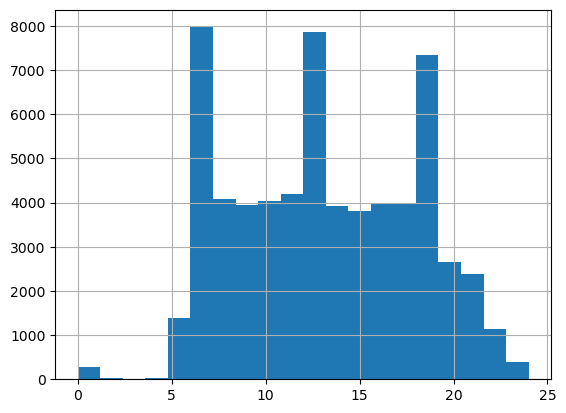

In [516]:
time['DepTime_Hour'].hist(bins=20)

<Axes: >

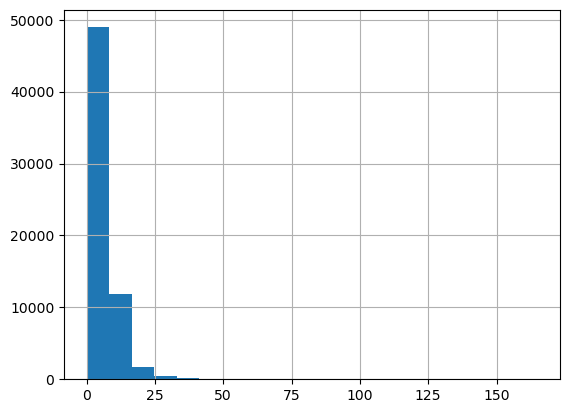

In [518]:
time['TaxiIn'].hist(bins=20)

<Axes: >

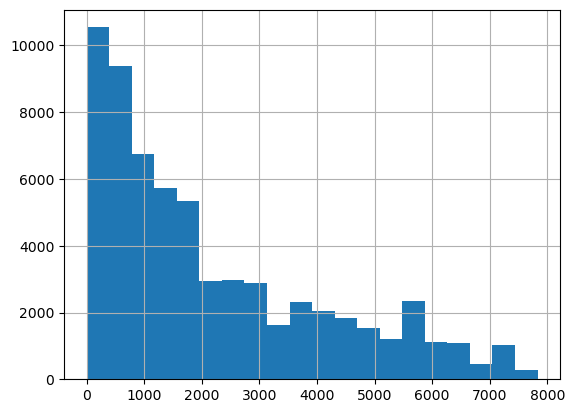

In [520]:
time['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [524]:
from sklearn.preprocessing import StandardScaler

def transform_data(data):
    num = data.select_dtypes(np.number).columns
    data[num] = data[num].fillna(0)
    standart = StandardScaler()
    data[num] = standart.fit_transform(data[num])
    
    cat = data.select_dtypes(object).columns
    data[cat] = data[cat].fillna('nan')
    dum = pd.get_dummies(data[cat])
    result = pd.concat([data, dum], axis = 1).drop(cat, axis = 1)
    return result

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [527]:
data1 = transform_data(time)
print(data1.columns.size)

635


**11.** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [530]:
from sklearn.model_selection import train_test_split
Y = data1["DepDelay"]
X = data1.drop(columns=["DepDelay"])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=35)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**12.** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [561]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=35)

x_train = X_train[:1000]
y_train = y_train[:1000]

lin_reg = LinearRegression().fit(x_train, y_train)

y_train_pred = lin_reg.predict(x_train)
y_pred = lin_reg.predict(X_test)

print("MSE подвыборка:", mean_squared_error(y_train, y_train_pred))
print("MSE контрольная выборка:", mean_squared_error(y_test, y_pred))
print("R^2 подвыборка:", r2_score(y_train, y_train_pred))
print("R^2 контрольная выборка:", r2_score(y_test, y_pred))


MSE подвыборка: 0.4425816683374733
MSE контрольная выборка: 1.1149425889210556
R^2 подвыборка: 0.384449831937434
R^2 контрольная выборка: -0.1407802064168704


Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**13.** Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

In [549]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

lasso_model = Lasso().fit(x_train, y_train)
ridge_model = Ridge().fit(x_train, y_train)
print("0-коэффициенты для модели Lasso:", np.sum(np.absolute(lasso_model.coef_) < 10 ** (-10)))
print("0-коэффициенты для модели Ridge:", np.sum(np.absolute(ridge_model.coef_) < 10 ** (-10)))

0-коэффициенты для модели Lasso: 634
0-коэффициенты для модели Ridge: 293


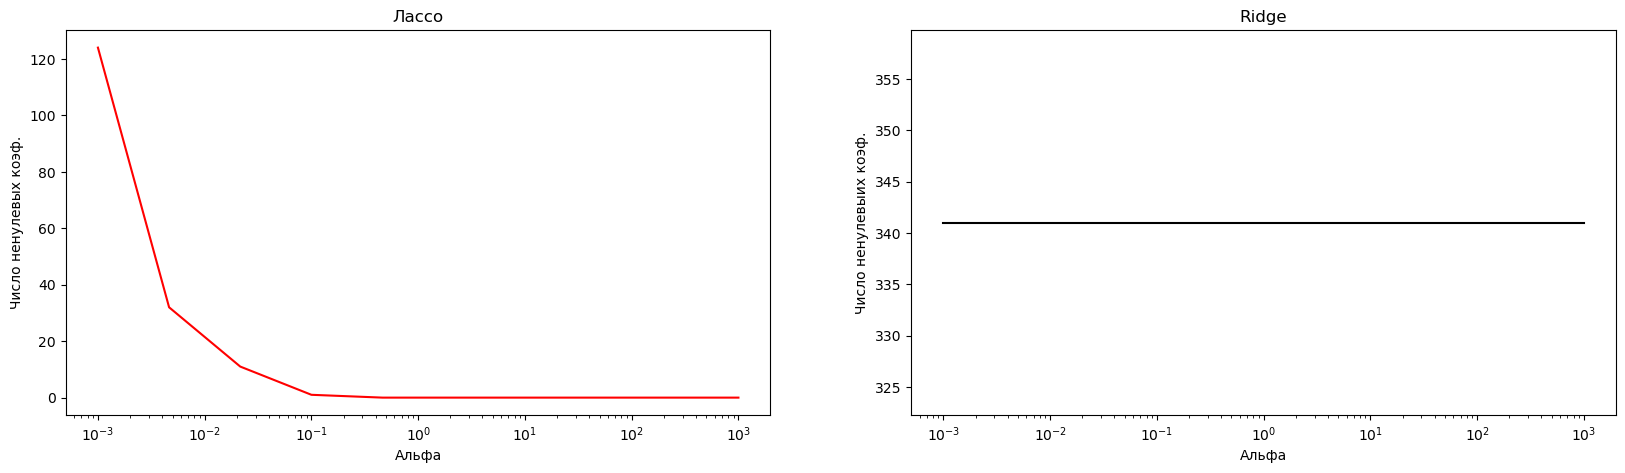

In [565]:
import matplotlib.pyplot as plt

a = 10 ** np.linspace(-3, 3, 10)
L_zeros = []
R_zeros = []

for i in a:
    lasso_a = Lasso(i).fit(x_train, y_train)
    ridge_a = Ridge(i).fit(x_train, y_train)
    L_zeros.append(np.sum(np.absolute(lasso_a.coef_) >= 10 ** (-10)))
    R_zeros.append(np.sum(np.absolute(ridge_a.coef_) >= 10 ** (-10)))

fig, axes = plt.subplots(1, 2, figsize = (20, 5))
axes[0].plot(a, L_zeros, color='red')
axes[0].set_xlabel("Альфа")
axes[0].set_ylabel("Число ненулевых коэф.")
axes[0].set_title("Лассо")
axes[0].set_xscale('log')
axes[1].plot(a, R_zeros, color='black')
axes[1].set_xlabel("Альфа")
axes[1].set_ylabel("Число ненулевыих коэф.")
axes[1].set_title("Ridge")
axes[1].set_xscale('log')


In [554]:
from sklearn.metrics import mean_absolute_error

RMSE = mean_squared_error(Y_test, ridge_model.predict(X_test))
MAE = mean_absolute_error(Y_test, ridge_model.predict(X_test))
Rsquared = ridge_model.score(X_test, Y_test)
print('RMSE = ', RMSE, '\nMAE =', MAE, '\nR^2 =', Rsquared)

RMSE =  1.0255216144409096 
MAE = 0.5755848697496518 
R^2 = -0.049286995251464516


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

Лучшее значение alpha для neg_root_mean_squared_error : 1000.0
Лучшая метрика: -0.28481828850146984 

Лучшее значение alpha для neg_mean_absolute_error : 1000.0
Лучшая метрика: -0.24464537986098495 

Лучшее значение alpha для r2 : 1000.0
Лучшая метрика: -0.01574823700283092 



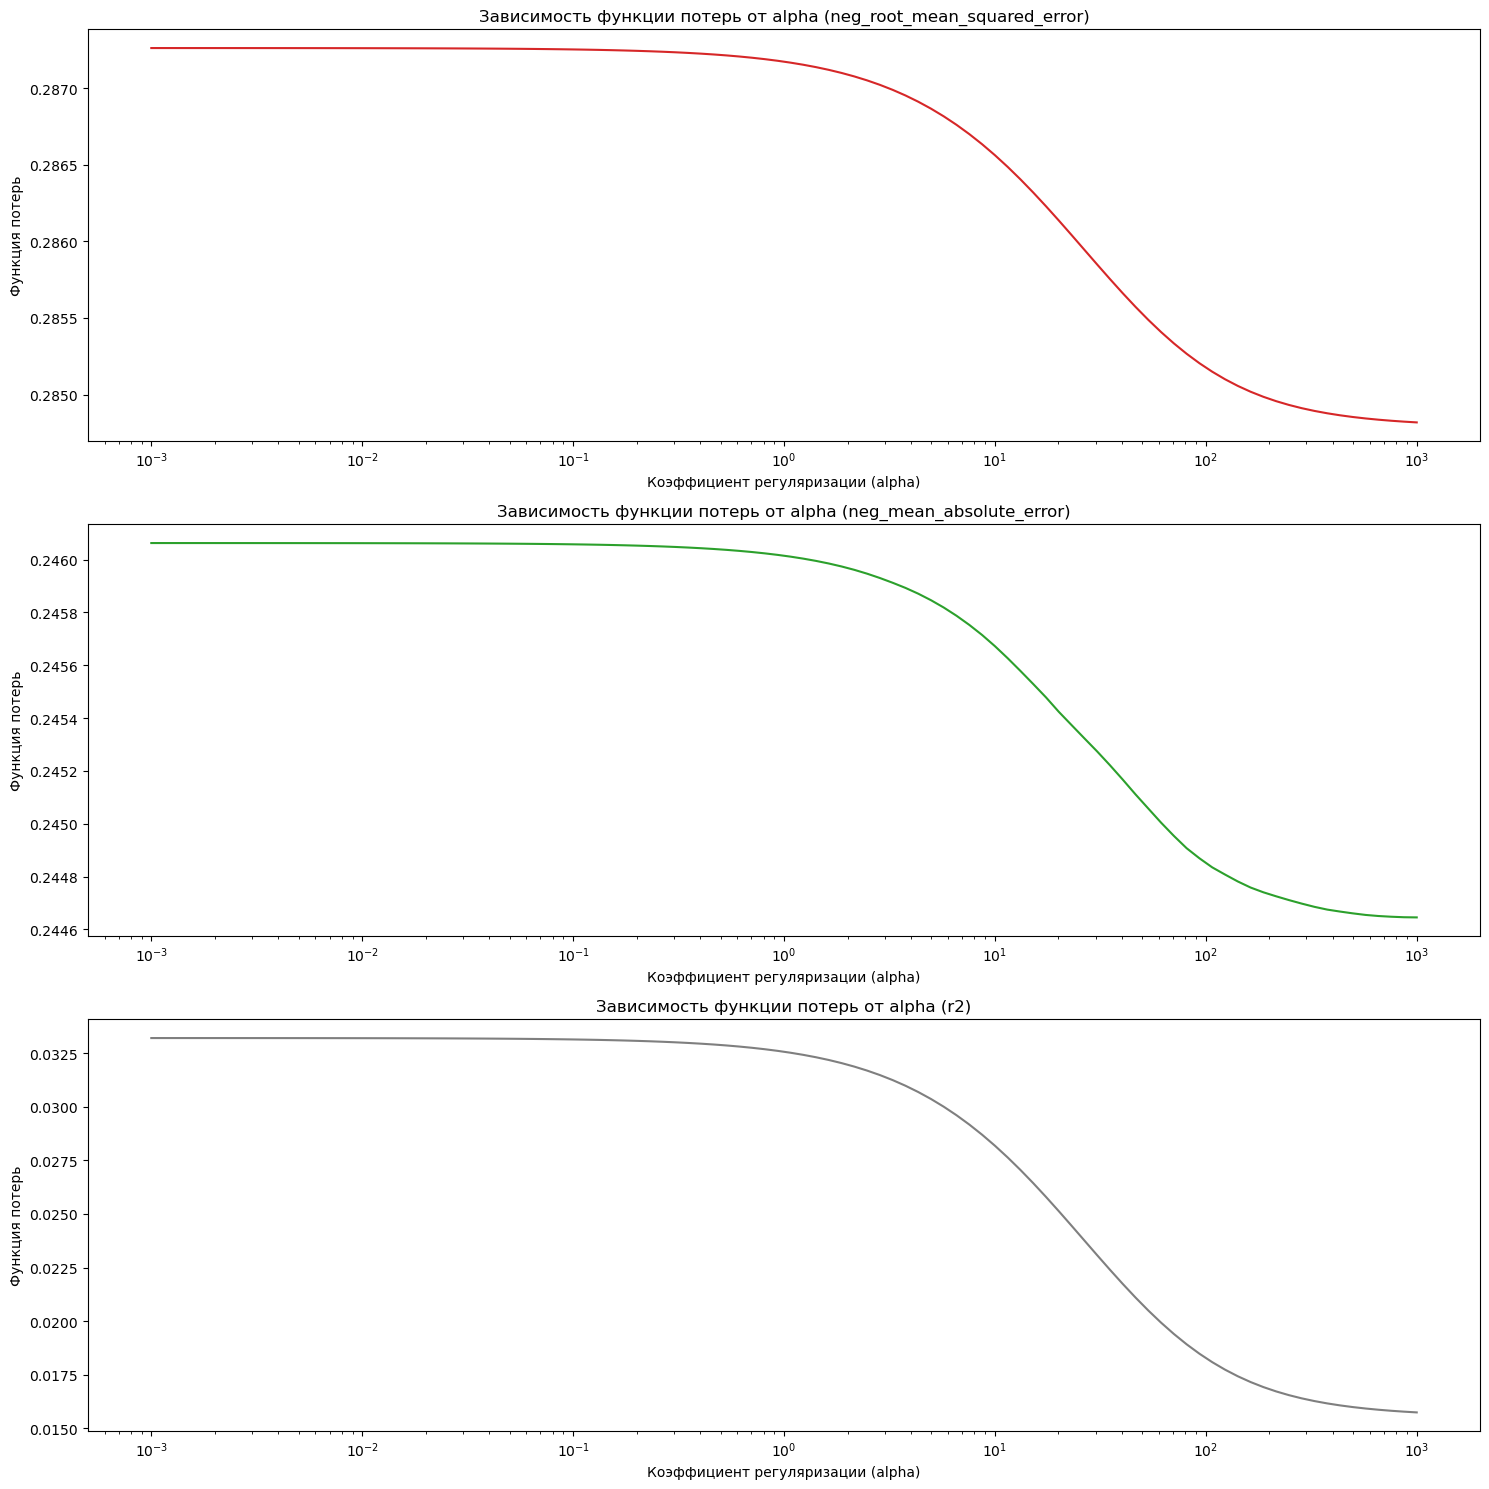

In [567]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
np.random.seed(42)
X = np.random.rand(1000, 10)  
y = np.random.rand(1000)       

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alphas = 10 ** np.linspace(-3, 3, 100)
scorings = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2']
fig, ax = plt.subplots(3, 1, figsize=(15, 15))
colors = ['tab:red', 'tab:green', 'tab:grey']

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for i, scoring in enumerate(scorings):
    ridge_grid = GridSearchCV(Ridge(), [{'alpha': alphas}], scoring=scoring, cv=kf)
    ridge_grid.fit(x_train, y_train)
    best_alpha = ridge_grid.best_params_["alpha"]
    best_score = ridge_grid.best_score_
    print('Лучшее значение alpha для', scoring, ':', best_alpha)
    print('Лучшая метрика:', best_score, '\n')
    ax[i].plot(alphas, -ridge_grid.cv_results_['mean_test_score'], color=colors[i])
    ax[i].set_title(f'Зависимость функции потерь от alpha ({scoring})')
    ax[i].set_ylabel('Функция потерь')
    ax[i].set_xlabel('Коэффициент регуляризации (alpha)')
    ax[i].set_xscale('log')

plt.tight_layout()
plt.show()


**14.** Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

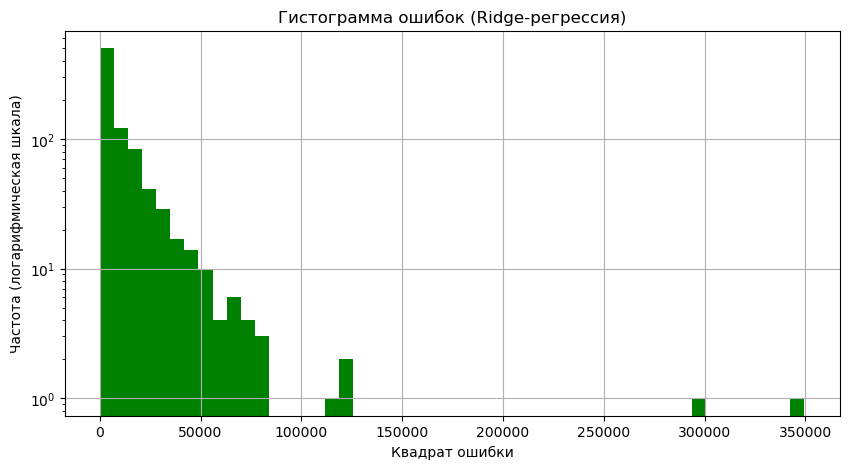

In [573]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import Ridge

X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

np.random.seed(42)
outliers = np.random.normal(0, 10, size=50)
y_with_outliers = np.concatenate([y, outliers])

X_outliers = np.random.rand(50, X.shape[1]) * 10  
X_combined = np.vstack([X, X_outliers])  

X_train, X_test, y_train, y_test = train_test_split(X_combined, y_with_outliers, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=1.0)
y_predict = cross_val_predict(ridge_model, X_train, y_train, cv=5)
error = (y_predict - y_train) ** 2
plt.figure(figsize=(10, 5))
plt.hist(error, bins=50, color='green')
plt.yscale("log")
plt.title("Гистограмма ошибок (Ridge-регрессия)")
plt.xlabel("Квадрат ошибки")
plt.ylabel("Частота (логарифмическая шкала)")
plt.grid(True)
plt.show()
